In [3]:
## Audit Insights Dashboard

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('audit_log.csv', parse_dates=['timestamp'])

In [6]:
print(df.head())

            timestamp user_id           action   result  module severity  \
0 2025-08-01 10:01:12   U1023            Login  Success    Auth      Low   
1 2025-08-01 10:05:47   U2045      File Access  Failure    Docs     High   
2 2025-08-01 10:06:21   U3051  Settings Change  Success  System   Medium   
3 2025-08-01 10:10:59   U2045      File Access  Failure    Docs     High   
4 2025-08-01 10:15:42   U1023            Login  Failure    Auth   Medium   

      location  
0      Toronto  
1  Mississauga  
2       Remote  
3  Mississauga  
4      Toronto  


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df['hour'] = df['timestamp'].dt.hour

C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\2689712503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_by_module, x='module', y='failures', palette='Reds_r')
C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\2689712503.py:7: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


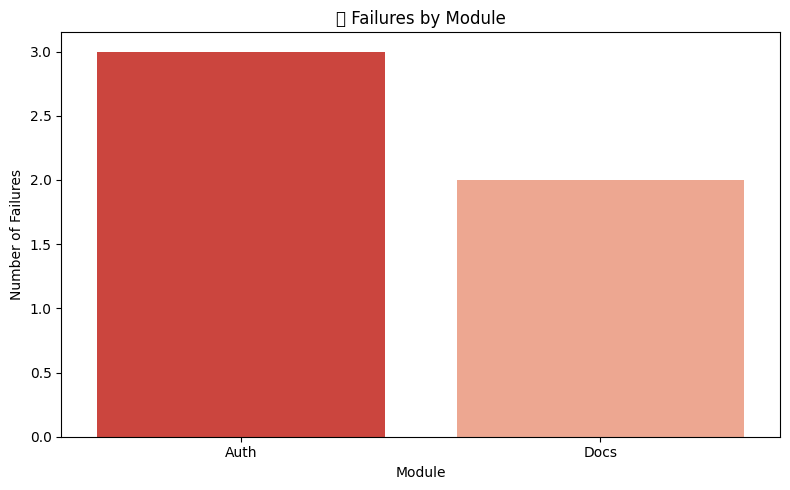

In [9]:
error_by_module = df[df['result'] == 'Failure'].groupby('module').size().reset_index(name='failures')
plt.figure(figsize=(8,5))
sns.barplot(data=error_by_module, x='module', y='failures', palette='Reds_r')
plt.title('❌ Failures by Module')
plt.ylabel("Number of Failures")
plt.xlabel("Module")
plt.tight_layout()
plt.show()

C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\3613687418.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


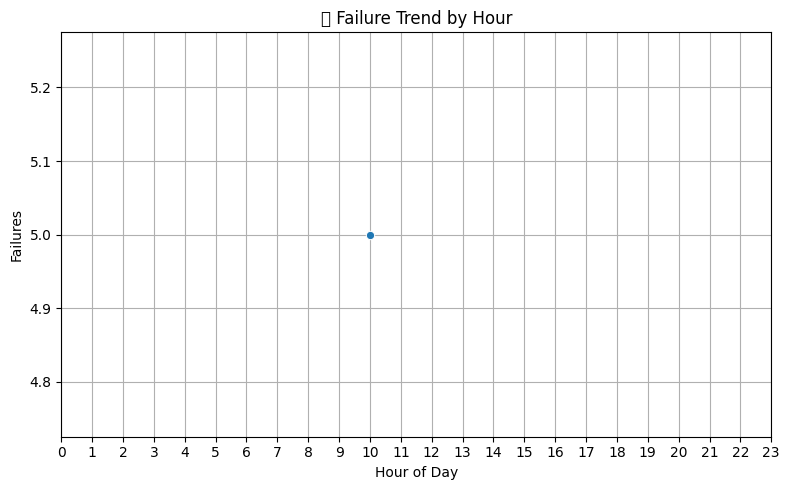

In [10]:
failures_by_hour = df[df['result'] == 'Failure'].groupby('hour').size().reset_index(name='failures')
plt.figure(figsize=(8,5))
sns.lineplot(data=failures_by_hour, x='hour', y='failures', marker='o')
plt.title('📊 Failure Trend by Hour')
plt.ylabel("Failures")
plt.xlabel("Hour of Day")
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\3087520951.py:5: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


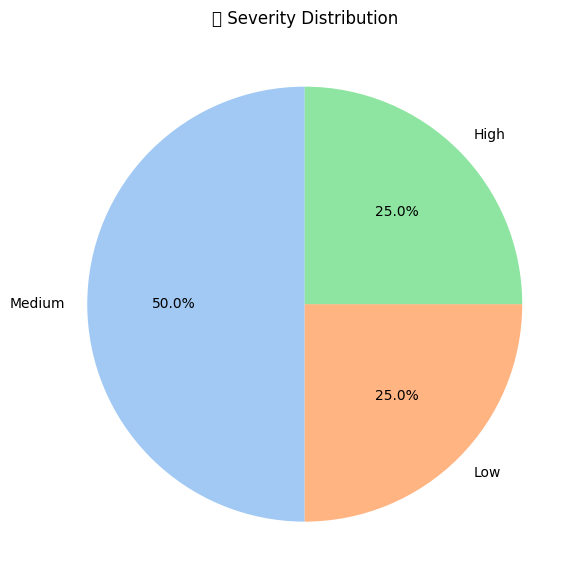

In [11]:
plt.figure(figsize=(6,6))
df['severity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("📌 Severity Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\4163938884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=failures_by_user.index, y=failures_by_user.values, palette='coolwarm')
C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\4163938884.py:7: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


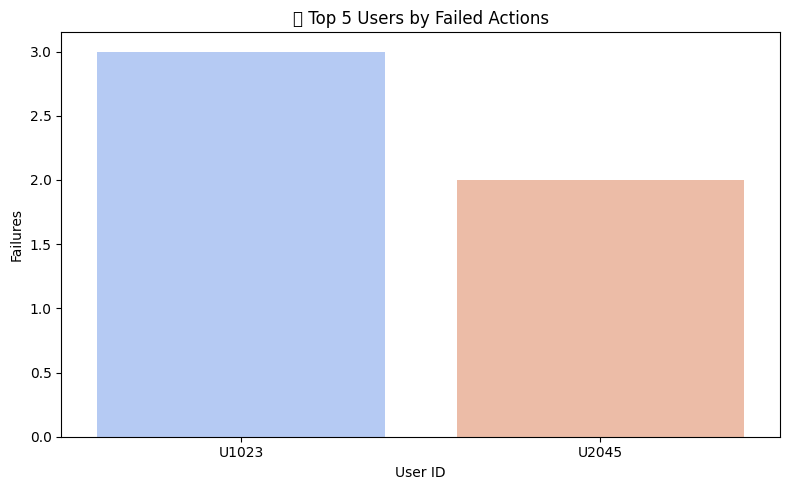

In [12]:
failures_by_user = df[df['result'] == 'Failure']['user_id'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=failures_by_user.index, y=failures_by_user.values, palette='coolwarm')
plt.title("🚨 Top 5 Users by Failed Actions")
plt.xlabel("User ID")
plt.ylabel("Failures")
plt.tight_layout()
plt.show()

C:\Users\rajvi\AppData\Local\Temp\ipykernel_5564\221833533.py:7: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\rajvi\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


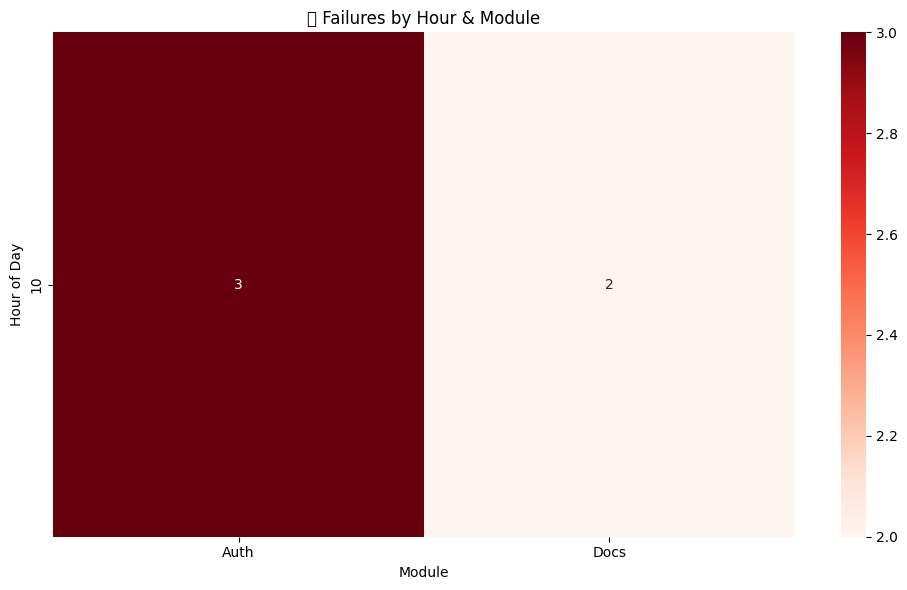

In [13]:
heatmap_data = df[df['result'] == 'Failure'].groupby(['hour', 'module']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title("🔥 Failures by Hour & Module")
plt.xlabel("Module")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

In [14]:
error_summary = df[df['result'] == 'Failure'].groupby(['module', 'severity']).size().reset_index(name='failures')
error_summary.to_csv("error_summary.csv", index=False)


In [15]:
risky_users = df[df['result'] == 'Failure']['user_id'].value_counts()
print("⚠️ Users with more than 3 failures:")
print(risky_users[risky_users > 3])


⚠️ Users with more than 3 failures:
Series([], Name: count, dtype: int64)
